# Análisis de Relaciones y Dependencias del CoE contra otros indicadores
## 2018 - 2022

In [14]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Carga de datos
df_2018 = pd.read_csv('2018_data.csv')
df_2018 = df_2018.drop('Unnamed: 0', axis=1)
df_2018 = df_2018.iloc[:-1, :]

df_2019 = pd.read_csv('2019_data.csv')
df_2019 = df_2019.drop('Unnamed: 0', axis=1)
df_2019 = df_2019.iloc[:-1, :]

df_2020 = pd.read_csv('2020_data.csv')
df_2020 = df_2020.drop('Unnamed: 0', axis=1)
df_2020 = df_2020.iloc[:-1, :]

df_2021 = pd.read_csv('2021_data.csv')
df_2021 = df_2021.drop('Unnamed: 0', axis=1)
df_2021 = df_2021.iloc[:-1, :]

df_2022 = pd.read_csv('2022_data.csv')
df_2022 = df_2022.drop('Unnamed: 0', axis=1)
df_2022 = df_2022.iloc[:-1, :]

df_combined = pd.concat([df_2018.iloc[:-1,:], df_2019.iloc[:-1,:],
                         df_2020.iloc[:-1,:], df_2021.iloc[:-1,:],
                         df_2022.iloc[:-1,:]], ignore_index=True)
print(df_combined.head())

               Nombre    Codigo Partic en\nIndice Prec Y Cotiz     CoE  \
0    Fomento Econ Mex  FEMSAUBD                         10.020  0.0934   
1       America Movil      AMXB                          8.890  0.2526   
2             GMexico  GMEXICOB                          8.850  0.1737   
3  Wal Mart de Mexico    WALMEX                          8.430  0.0864   
4               Cemex  CEMEXCPO                          6.710  0.2587   

     CARBON   Beta  Ln B/M     Lev    OIStd     EFdev      ROA  IND  YD 2022  \
0    3.3200  0.848  1.0362  0.4178  0.00816  0.120899  0.05621  1.0      0.0   
1   11.3228  0.772  1.4497  0.8280  0.01969  0.201411  0.03668  0.0      0.0   
2    7.6005  1.131  0.2807  0.4746  0.03505  0.167937  0.06407  1.0      0.0   
3    1.8447  0.806  1.6660  0.4620  0.01927  0.014419  0.12448  0.0      0.0   
4  176.7534  1.286 -0.2815  0.6027  0.01478  0.104979  0.01973  1.0      0.0   

   YD 2021  YD 2020  YD 2019  YD 2018  
0      0.0      0.0      0.0      

In [16]:
X = df_combined.iloc[:, 4:12]
y = df_combined.iloc[:, 3]

## Modelo Random Forest para Ind = 0

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

df_0 = df_combined[df_combined['IND']==0]

X = df_0.iloc[:, 4:12]
y = df_0.iloc[:, 3]

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

Aplicamos el RMSE relativo

In [18]:
# Predicciones del modelo
y_pred = rf_model.predict(X)

# Calcular RMSE
rmse = np.sqrt(np.mean((y - y_pred)**2))

# Calcular la media de los valores reales
mean_y = np.mean(y)

# Calcular RMSE relativo
relative_rmse = rmse / mean_y

print(f"RMSE: {rmse}")
print(f"RMSE Relativo: {relative_rmse}")


RMSE: 0.04207640050688008
RMSE Relativo: 0.268697663032952


El modelo tiene un error relativo del 26.86%, lo que indica un desempeño moderado.

**Importancia de las características**

In [19]:
# Extrae la importancia de las características
feature_importances = rf_model.feature_importances_

# Crea un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características según el modelo de Random Forest para Ind=0:")
print(importance_df)


Importancia de las características según el modelo de Random Forest para Ind=0:
  Característica  Importancia
2         Ln B/M     0.573091
4          OIStd     0.241005
0         CARBON     0.142932
3            Lev     0.021185
5          EFdev     0.007707
6            ROA     0.007521
1           Beta     0.006560
7            IND     0.000000


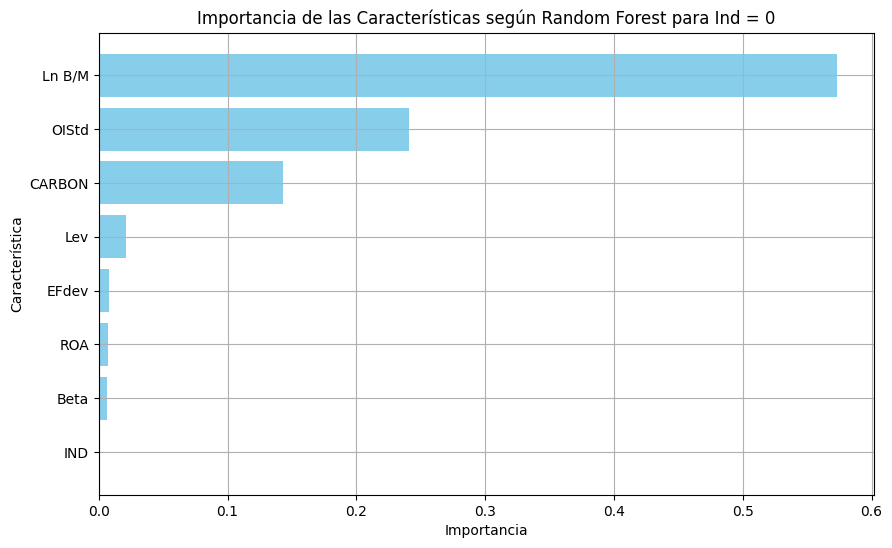

In [20]:
# Gráfica de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest para Ind = 0')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes aparezcan primero
plt.grid('True')
plt.show()


## Modelo Random Forest para Ind = 1

In [21]:
df_1 = df_combined[df_combined['IND']==1]

X = df_1.iloc[:, 4:12]
y = df_1.iloc[:, 3]

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [22]:
# Predicciones del modelo
y_pred = rf_model.predict(X)

# Calcular RMSE
rmse = np.sqrt(np.mean((y - y_pred)**2))

# Calcular la media de los valores reales
mean_y = np.mean(y)

# Calcular RMSE relativo
relative_rmse = rmse / mean_y

print(f"RMSE: {rmse}")
print(f"RMSE Relativo: {relative_rmse}")

RMSE: 0.0206679560318221
RMSE Relativo: 0.11688551230765296


El modelo tiene un error relativo del 11.68%, lo que indica un buen desempeño.

**Importancia de las características**

In [23]:
# Extrae la importancia de las características
feature_importances = rf_model.feature_importances_

# Crea un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características según el modelo de Random Forest para Ind=1:")
print(importance_df)

Importancia de las características según el modelo de Random Forest para Ind=1:
  Característica  Importancia
2         Ln B/M     0.286364
1           Beta     0.202318
3            Lev     0.176789
0         CARBON     0.112743
5          EFdev     0.106009
4          OIStd     0.059751
6            ROA     0.056026
7            IND     0.000000


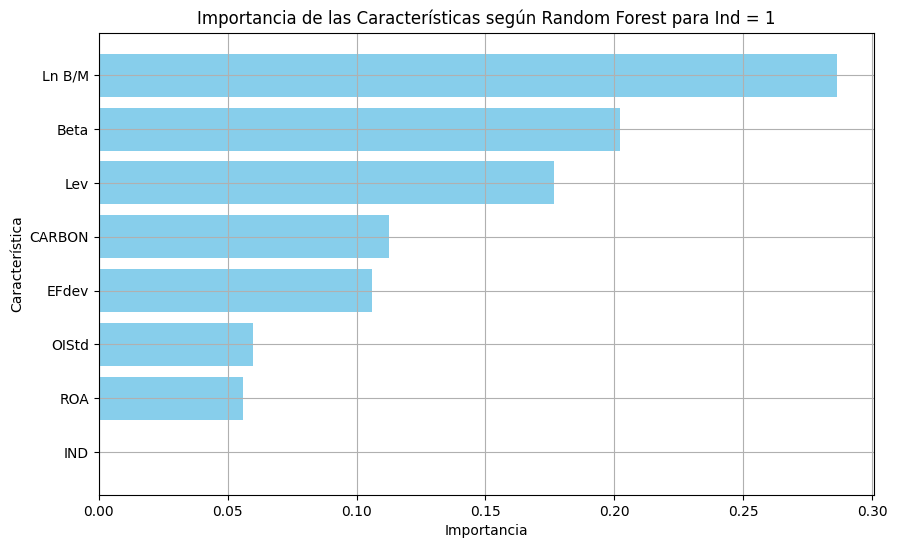

In [24]:
# Gráfica de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest para Ind = 1')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes aparezcan primero
plt.grid('True')
plt.show()